In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import svm
from sklearn.datasets.samples_generator import make_blobs

In [27]:
raw_data = pd.read_csv('epi_r.csv')

In [173]:
#raw_data

In [230]:
#Create additional features based on ratings and titles. Find keywords in the title and create new fields 
#Keywords: Chicken, Beef, Fish
#count the averaage ratings for each occurance and create a new field
#raw_data['Chicken']= np.where(raw_data[raw_data['title'].str.contains('chicken'),raw_data['rating'].mean(),0])

#use keywords to build predictive variables
keywords = ['Chicken', 'Beef', 'Pork', 'Potatoes', 'Chocolate', 'Fish', 'Cake', 'Ham','Brocolli','Vegetable']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matchin
    raw_data[str(key)] = raw_data.title.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )    
    raw_data[str(key)].replace(False, 0, inplace=True)
    

In [231]:
#create a new binary output variable based on rating row values being greater than or less than the median.
raw_data['y_predictor'] = np.where(raw_data['rating'] > raw_data['rating'].median(),1,0)

In [232]:
#check to see if values were applied
raw_data['y_predictor'].value_counts()

0    13758
1     2106
Name: y_predictor, dtype: int64

In [233]:
#drop columns that don't have just 0 value
#raw_data = raw_data.drop('Deserts', axis=1)

In [234]:
raw_data

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,Potatoes,Ham,Calories_ndist,Protein_ndist,Fat_ndist,sodium_ndist,Sodium_ndist,Chicken_ndist,Beef_ndist,Vegetable
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.056784,3.433987,2.079442,6.327937,6.327937,0.000000,0.000000,0.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.001415,2.944439,3.178054,7.272398,7.272398,0.000000,0.000000,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.111988,1.945910,2.079442,5.111988,5.111988,0.000000,0.000000,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.306275,3.044522,3.496508,6.115892,6.115892,0.000000,0.000000,0.0
5,The Best Blts,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.855409,2.995732,4.382027,6.949856,6.949856,0.000000,0.000000,0.0
8,Korean Marinated Beef,4.375,170.0,7.0,10.0,1272.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.141664,2.079442,2.397895,7.149132,7.149132,0.000000,0.693147,0.0
9,Ham Persillade with Mustard Potato Salad and M...,3.750,602.0,23.0,41.0,1696.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.401917,3.178054,3.737670,7.436617,7.436617,0.000000,0.000000,0.0
10,"Yams Braised with Cream, Rosemary and Nutmeg",3.750,256.0,4.0,5.0,30.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.549076,1.609438,1.791759,3.433987,3.433987,0.000000,0.000000,0.0
12,Banana-Chocolate Chip Cake With Peanut Butter ...,4.375,766.0,12.0,48.0,439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.642487,2.564949,3.891820,6.086775,6.086775,0.000000,0.000000,0.0
13,Beef Tenderloin with Garlic and Brandy,4.375,174.0,11.0,12.0,176.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.164786,2.484907,2.564949,5.176150,5.176150,0.000000,0.000000,0.0


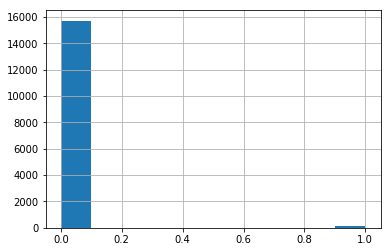

In [236]:
raw_data['Vegetable'].hist()

In [237]:
#lets add two new features that will square the data and perform a log funcion to see if we get the data
#to be close to a normal distribution
raw_data['Vegetable_ndist'] = np.log1p(raw_data['Vegetable'])

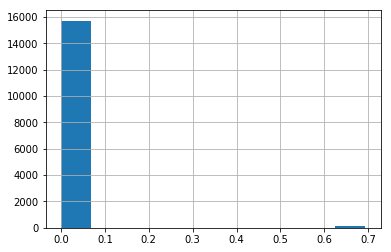

In [238]:
raw_data['Vegetable_ndist'].hist()

In [190]:
#lets add two new features that will square the data and perform a log funcion to see if we get the data
#to be close to a normal distribution
raw_data['Calories_ndist'] = np.log1p(raw_data['calories'])

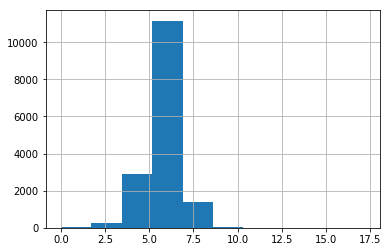

In [191]:
raw_data['Calories_ndist'].hist()

In [197]:
#add new features
raw_data['Protein_ndist'] = np.log1p(raw_data['protein'])

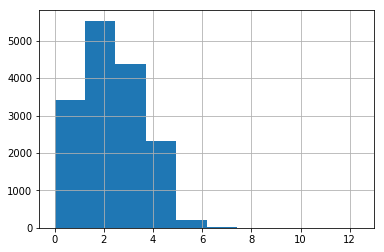

In [198]:
#verify new featurs
raw_data['Protein_ndist'].hist()

In [199]:
#add new features
raw_data['Fat_ndist'] = np.log1p(raw_data['fat'])

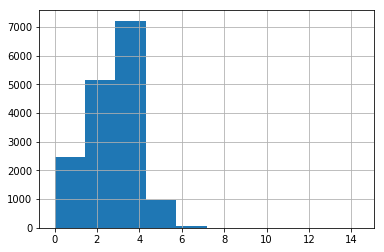

In [200]:
#verify new featurs
raw_data['Fat_ndist'].hist()

In [202]:
#add new features
raw_data['Sodium_ndist'] = np.log1p(raw_data['sodium'])

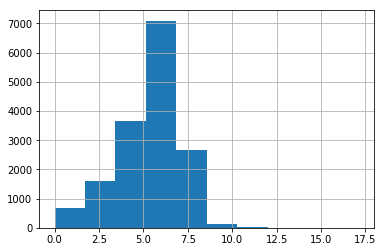

In [203]:
raw_data['Sodium_ndist'].hist()

In [223]:
#add new features
raw_data['Chicken_ndist'] = np.log1p(raw_data['Chicken'])

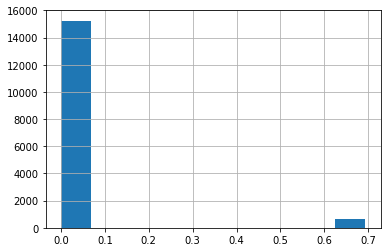

In [224]:
raw_data['Chicken_ndist'].hist()

In [225]:
#X = raw_data.iloc[:,1:] # we only take the first 2 features.
X= raw_data[['calories','protein','fat','sodium','Chicken','Beef','Pork','Chocolate','Fish',
                   'Cake','Brocolli','Vegetables','Potatoes','Ham','Calories_ndist','Protein_ndist','Sodium_ndist']]
y = raw_data[['y_predictor']]

#X=X.astype(int) 
#y=y.astype(int)

In [227]:
#check new binary outcome variable is created for y
y['y_predictor'].unique()

array([0, 1])

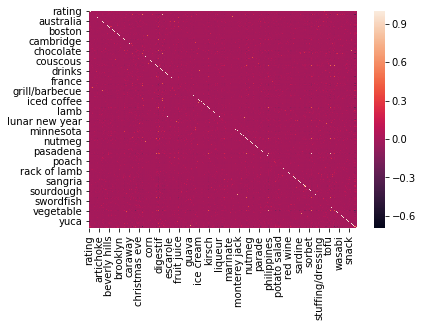

In [229]:
sns.heatmap(raw_data.corr())

In [247]:
# Declare a linear support vector machine classifier.
# Parameter regularization coefficient C described above.

from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
clf = LinearSVC(C=5.0,random_state=0, tol=1e-5)
clf.fit(X, np.ravel(y))

LinearSVC(C=5.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)

In [253]:
#import the cross validation train test split functions]

# Declare a logistic regression classifier.
# Parameter regularization coefficient C described above.

from sklearn.model_selection import cross_val_score
print('\n Percentage accuracy of each training and testing set')
cv_scores = cross_val_score(clf, X, y, cv=10)

print(cv_scores.mean())

# Fit the model, does it in place
clf.fit(X, np.ravel(y))

#print('\n R2 Percentage accuracy')
print(clf.score(X, np.ravel(y)))

pred_y_sklearn = clf.predict(X) #use for just X

print('\n Accuracy by property crime predicition \n')
print(pd.crosstab(pred_y_sklearn, np.ravel(y)))

#cv_results= cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)


 Percentage accuracy of each training and testing set


/Users/karenmcgee/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/karenmcgee/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/karenmcgee/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/karenmcgee/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

0.7195836311118453
0.8483988905698436

 Accuracy by property crime predicition 

col_0      0     1
row_0             
0      13371  2018
1        387    88


In [255]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X, y, cv=5)

/Users/karenmcgee/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/karenmcgee/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/karenmcgee/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/karenmcgee/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expec

array([0.86609956, 0.59596596, 0.867318  , 0.86696091, 0.86664565])